In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # mean and std for MNIST
])

# Load training and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# DataLoaders for batching
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:40<00:00, 247443.87it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 122036.69it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:06<00:00, 257986.21it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 529063.78it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [91]:
import torch.nn as nn
import torch.nn.functional as F

class mlp(nn.Module):
    def __init__(self, init_type: str):
        super().__init__()
        self.seq = nn.Sequential( # default initialization is kaiming uniform
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )
        self.criterion = F.cross_entropy # logits, targets
        self.initialize_weights(init_type=init_type)

    def forward(self, x):
        x = x.view(x.shape[0], 28*28)
        logits = self.seq(x) # 64, 10
        return logits # (64, 10) tensor

    def initialize_weights(self, init_type : str):
        for m in self.modules():
            print(m)
            if isinstance(m, nn.Linear):
                m.bias.data = torch.zeros_like(m.bias)
                if init_type == "kaiming": # normal
                    m.weight.data = torch.randn_like(m.weight) * (2/m.weight.shape[1])**0.5
                else: #xavier
                    m.weight.data = torch.randn_like(m.weight) * (2/ (m.weight.shape[1] + m.weight.shape[0]) )**0.5

In [92]:
device = 'cuda' if torch.cuda.is_available else 'cpu'

In [93]:
# training loop
import numpy as np
train_losses_kaiming = []
test_losses_kaiming = []
model = mlp(init_type="kaiming").to(device)
optimizer = torch.optim.Adam(lr = 5e-4 , betas = (0.90, 0.99), params=model.parameters())
num_epochs = 20
for epoch in range(num_epochs):
    print("epoch", epoch)
    total_train_loss = 0
    total_test_loss = 0
    for [x, y] in train_loader:
        x,y = x.to(device), y.to(device)
        optimizer.zero_grad()
        logits = model(x)
        loss = model.criterion(logits, y)
        loss.backward()
        optimizer.step()
        total_train_loss += torch.sum(loss).item()
    train_losses_kaiming.append(total_train_loss / len(train_loader))
    with torch.no_grad():
        for [x,y] in test_loader:
            x,y = x.to(device), y.to(device)
            logits = model(x)
            loss = model.criterion(logits, y)
            total_test_loss += torch.sum(loss).item()
        test_losses_kaiming.append(total_test_loss / len(test_loader))

mlp(
  (seq): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)
Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=10, bias=True)
)
Linear(in_features=784, out_features=512, bias=True)
ReLU()
Linear(in_features=512, out_features=128, bias=True)
ReLU()
Linear(in_features=128, out_features=10, bias=True)
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19


In [94]:
# training loop
import numpy as np
train_losses_xavier = []
test_losses_xavier = []
model = mlp(init_type="xavier").to(device)
optimizer = torch.optim.Adam(lr = 5e-4 , betas = (0.90, 0.99), params=model.parameters())
num_epochs = 20
for epoch in range(num_epochs):
    print("epoch", epoch)
    total_train_loss = 0
    total_test_loss = 0
    for [x, y] in train_loader:
        x,y = x.to(device), y.to(device)
        optimizer.zero_grad()
        logits = model(x)
        loss = model.criterion(logits, y)
        loss.backward()
        optimizer.step()
        total_train_loss += torch.sum(loss).item()
    train_losses_xavier.append(total_train_loss / len(train_loader))
    with torch.no_grad():
        for [x,y] in test_loader:
            x,y = x.to(device), y.to(device)
            logits = model(x)
            loss = model.criterion(logits, y)
            total_test_loss += torch.sum(loss).item()
        test_losses_xavier.append(total_test_loss / len(test_loader))

mlp(
  (seq): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)
Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=10, bias=True)
)
Linear(in_features=784, out_features=512, bias=True)
ReLU()
Linear(in_features=512, out_features=128, bias=True)
ReLU()
Linear(in_features=128, out_features=10, bias=True)
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19


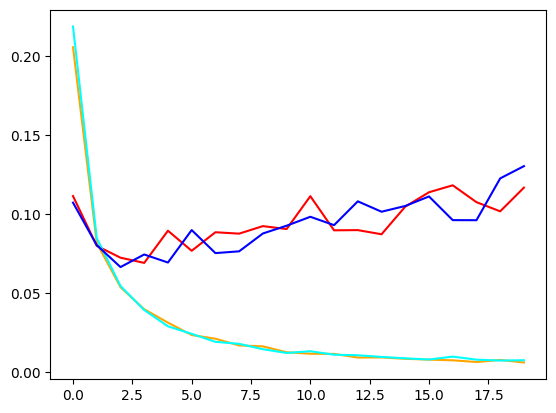

In [95]:
import matplotlib.pyplot as plt

x = list(np.arange(num_epochs))
plt.plot(x, train_losses_xavier, color = 'orange')
plt.plot(x, test_losses_xavier, color = 'red')
plt.plot(x, train_losses_kaiming, color = 'cyan')
plt.plot(x, test_losses_kaiming, color = 'blue')
plt.show()